# PSO Practice
Particle Swarm Optimization

- Reference:
    - https://nathanrooy.github.io/posts/2016-08-17/simple-particle-swarm-optimization-with-python/
    - http://jjcommons.csie.isu.edu.tw/research/download/PSO.pdf

In [11]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 1. 定義Loss Function

$loss = x_1^2 + x_2 ^2$


$\hat{x_1}, \hat{x_2} = argmin(loss)$



In [2]:
def loss_function(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

** 定義 Particle Class (properties and methods) **

In [3]:
class Particle:
    def __init__(self,x0):
        self.position_i=[]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[]          # best position individual
        self.err_best_i=-1          # best error individual
        self.err_i=-1               # error individual
        self.num_dimensions = len(x0)

        for i in range(0, self.num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])
    def getPosition(self):
        return self.position_i
    
    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)
        if self.err_i < self.err_best_i or self.err_best_i==-1:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    def update_velocity(self,pos_best_g):
        w, c1, c2 =0.5, 1, 2        
        for i in range(0, self.num_dimensions):
            r1=random.random()
            r2=random.random()
            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    def update_position(self,bounds):
        for i in range(0, self.num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i]=bounds[i][0]

## 2. 定義Soluton Limit & Initial State

$Initial state:  x1=5, x2=5$
  
$solution limit: -10<x_1<10, -10<x_2<10$   

In [4]:
initial=[5,5]               
bounds=[(-10,10),(-10,10)]  


## 3. Algorithm Steps
- 初始化每一個particle, 
    - initial position, 
    - random velocity
- iterative search 
    - 計算每個particle的loss
    - 紀錄最好的loss與position 
    - 更新每個particle的velocity
    - 更新每個particle的position

$V_{j, h}(t)=V_{j, h}(t-1) + c_1\phi_1(X_{j, h}^*-X_{j, h}(t-1)) + c_2\phi_2(X_{h}^\#-X_{j, h}(t-1)) $

$X_{j, h}(t) = X_{j, h}(t-1) + V_{j, h}(t)$


In [5]:
class PSO():    
    
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        self.costFunc=costFunc
        self.x0=x0
        self.bounds=bounds
        self.num_particles=num_particles
        self.maxiter=maxiter
        self.err_best_g=-1                   
        self.pos_best_g=[]
        self.swarm=[]
        self.swarmPos=[]
    def bestPosition(self):
        return self.pos_best_g

    def bestLoss(self):
        return self.err_best_g
    
    def getSwarm(self):
        return self.swarm
    
    def getswarmPos(self):
        return self.swarmPos
    
    def start(self):
        tmplist=[]
        for i in range(0, self.num_particles):
            self.swarm.append(Particle(self.x0))

        i=0
        while i < self.maxiter:
            for j in range(0, self.num_particles):
                self.swarm[j].evaluate(self.costFunc)

                # determine if current particle is the best (globally)
                if self.swarm[j].err_i < self.err_best_g or self.err_best_g == -1:
                    self.pos_best_g=list(self.swarm[j].position_i)
                    self.err_best_g=float(self.swarm[j].err_i)
            for j in range(0, self.num_particles):
                self.swarm[j].update_velocity(self.pos_best_g)
                self.swarm[j].update_position(self.bounds)
            
            tmp = list(map(lambda p: p.getPosition().copy(), self.swarm))
            self.swarmPos.append(list(tmp))
            i+=1
            




best position [0.0009913306476494223, 8.083804542231149e-05]
best loss 9.892712425567229e-07


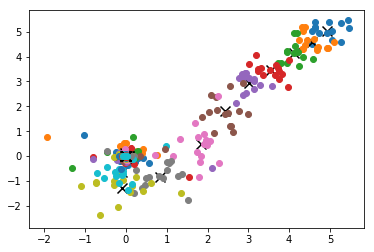

In [12]:
pso = PSO(loss_function,initial,bounds,num_particles=15,maxiter=30)
pso.start()

fig = plt.figure()
for s in pso.getswarmPos():
    pos_x = list(zip(*s))[0]
    pos_y = list(zip(*s))[1]
    plt.scatter([np.mean(pos_x)],[np.mean(pos_y)], marker='x', color='black', s=100)
    plt.scatter(pos_x, pos_y)
    
print('best position', pso.bestPosition())
print('best loss', pso.bestLoss())